<a href="https://colab.research.google.com/github/tuananh1006/Torch_Practice/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#%% Packages
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader

import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

import matplotlib.pyplot as plt
import seaborn as sns

# %% Data Import
data = sns.load_dataset("flights")
print(f'Number of Entries: {len(data)}')
data.head()

# %%


Number of Entries: 144


,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


<Axes: xlabel='None', ylabel='passengers'>

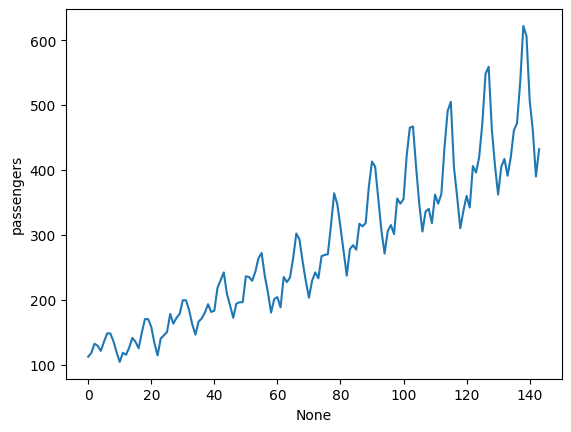

In [ ]:
sns.lineplot(x=data.index, y=data.passengers)


In [ ]:
# Convert passenter data to float32 for PyTorch
num_points = len(data)
Xy = data.passengers.values.astype(np.float32)

In [ ]:
#%% scale the data
scaler = MinMaxScaler()

Xy_scaled = scaler.fit_transform(Xy.reshape(-1, 1))


In [ ]:
# Restrucring
len_samples=10
y_restructed = []
X_restructured=[]
for i in range(num_points-len_samples):
  X_list=[]
  for j in range(i,i+len_samples):
    X_list.append(Xy_scaled[j])
  X_restructured.append(X_list)
  y_restructed.append(Xy_scaled[i+len_samples])

In [ ]:
# %% Train / Test Split
train_test_clipping = int(num_points * 0.8)
X_train = X_restructured[:train_test_clipping]
X_test = X_restructured[train_test_clipping:]
y_train = y_restructed[:train_test_clipping]
y_test = y_restructed[train_test_clipping:]


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
class TimeSeriesSet(Dataset):
  def __init__(self,X,y):
    super().__init__()
    self.X=torch.Tensor(X)
    self.y=torch.Tensor(y)
  def __len__(self):
    return len(self.X)
  def __getitem__(self,idx):
    return self.X[idx],self.y[idx]
train_loader=DataLoader(TimeSeriesSet(X_train,y_train),batch_size=16,shuffle=True)
test_loader=DataLoader(TimeSeriesSet(X_test,y_test),batch_size=16,shuffle=True)

In [ ]:
class TrigonometryModel(nn.Module):
    def __init__(self, input_size=1, output_size=1):
        super(TrigonometryModel, self).__init__()
        self.lstm = nn.LSTM(input_size, hidden_size=5, num_layers=1, batch_first=True)
        self.fc1 = nn.Linear(in_features=5, out_features=output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        x, status = self.lstm(x)
        x = x[:, -1, :]  # reshape for fc layer; out: BS, hidden
        x = self.fc1(x)
        # x = self.relu(x)

        return x

In [ ]:
#%% instantiate model, optimizer, and loss
model = TrigonometryModel()
# input = torch.rand((2, 10, 1))  # BS, seq_len, input_size
# model(input).shape  # out: [BS, seq_len, hidden]


#%% Loss and Optimizer
loss_fun = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.0001)
NUM_EPOCHS = 2000

#%% Train
for epoch in range(NUM_EPOCHS):
    for j, (X, y) in enumerate(train_loader):
        optimizer.zero_grad()
        y_pred = model(X.view(-1, 10, 1))
        loss = loss_fun(y_pred, y.unsqueeze(1))
        loss.backward()
        optimizer.step()
        print(f"Epoch: {epoch}, Loss: {loss.data}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([16, 1, 1])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:538: UserWarning: Using a target size (torch.Size([3, 1, 1])) that is different to the input size (torch.Size([3, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Kết quả truyền trực tuyến bị cắt bớt đến 5000 dòng cuối.
Epoch: 1375, Loss: 0.023884618654847145
Epoch: 1375, Loss: 0.05233399569988251
Epoch: 1375, Loss: 0.027827244251966476
Epoch: 1375, Loss: 0.04456954449415207
Epoch: 1375, Loss: 0.030841588973999023
Epoch: 1375, Loss: 0.029070520773530006
Epoch: 1375, Loss: 0.021600637584924698
Epoch: 1375, Loss: 0.02209874428808689
Epoch: 1376, Loss: 0.02650386653840542
Epoch: 1376, Loss: 0.0496845543384552
Epoch: 1376, Loss: 0.028245821595191956
Epoch: 1376, Loss: 0.027899155393242836
Epoch: 1376, Loss: 0.019717762246727943
Epoch: 1376, Loss: 0.03878411278128624
Epoch: 1376, Loss: 0.03761451318860054
Epoch: 1376, Loss: 0.023424530401825905
Epoch: 1377, Loss: 0.032952360808849335
Epoch: 1377, Loss: 0.041414111852645874
Epoch: 1377, Loss: 0.021309375762939453
Epoch: 1377, Loss: 0.020630547776818275
Epoch: 1377, Loss: 0.03070731833577156
Epoch: 1377, Loss: 0.03710515424609184
Epoch: 1377, Loss: 0.04301232844591141
Epoch: 1377, Loss: 0.0354919619858

In [ ]:
X_test_torch.shape

torch.Size([16, 10, 1])

In [ ]:
torch.unsqueeze(X_test_torch, 2)

tensor([[[[0.6100]],

         [[0.7104]],

         [[0.8571]],

         [[0.8784]],

         [[0.6931]],

         [[0.5849]],

         [[0.4981]],

         [[0.5811]],

         [[0.6042]],

         [[0.5541]]],


        [[[0.4498]],

         [[0.4942]],

         [[0.4595]],

         [[0.5830]],

         [[0.5637]],

         [[0.6100]],

         [[0.7104]],

         [[0.8571]],

         [[0.8784]],

         [[0.6931]]],


        [[[0.3977]],

         [[0.4498]],

         [[0.4942]],

         [[0.4595]],

         [[0.5830]],

         [[0.5637]],

         [[0.6100]],

         [[0.7104]],

         [[0.8571]],

         [[0.8784]]],


        [[[0.8784]],

         [[0.6931]],

         [[0.5849]],

         [[0.4981]],

         [[0.5811]],

         [[0.6042]],

         [[0.5541]],

         [[0.6081]],

         [[0.6892]],

         [[0.7104]]],


        [[[0.5849]],

         [[0.4981]],

         [[0.5811]],

         [[0.6042]],

         [[0.5541]],

  

<Axes: >

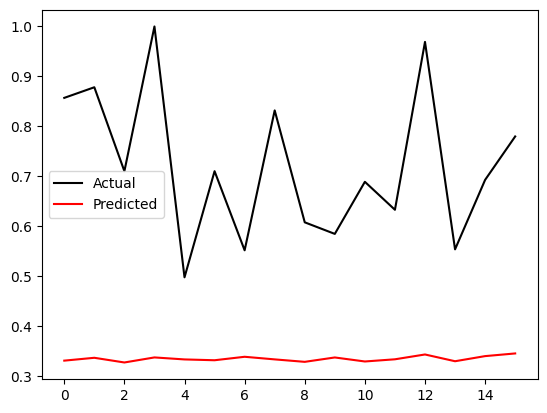

In [ ]:
# %% Create Predictions
test_set = TimeSeriesSet(X_test, y_test)
X_test_torch, y_test_torch = next(iter(test_loader))
with torch.no_grad():
    y_pred = model(X_test_torch).detach().squeeze().numpy()
y_act = y_test_torch.numpy()
x_act = range(y_act.shape[0])
sns.lineplot(x=x_act, y=y_act.squeeze(), label = 'Actual',color='black')
sns.lineplot(x=x_act, y=y_pred, label = 'Predicted',color='red')



In [ ]:
y_pred

array([0.33134174, 0.33703858, 0.32766014, 0.33776325, 0.33376575,
       0.33212143, 0.3390602 , 0.33383954, 0.3289249 , 0.33768988,
       0.32965505, 0.33402306, 0.34366614, 0.3301432 , 0.34040093,
       0.3457312 ], dtype=float32)

In [ ]:
y_act

array([[0.8571429 ],
       [0.8783784 ],
       [0.71042466],
       [1.        ],
       [0.4980695 ],
       [0.71042466],
       [0.55212355],
       [0.8320464 ],
       [0.60810804],
       [0.5849421 ],
       [0.6891892 ],
       [0.6332046 ],
       [0.96911204],
       [0.554054  ],
       [0.69305015],
       [0.7799227 ]], dtype=float32)

In [ ]:
# %% predict future timeseries
# solution by Fabian Stohr
num_future_steps = 3

# Initialize a new input tensor with additional future steps
X_extrapolate = torch.cat((X_test_torch, torch.zeros(X_test_torch.shape[0], num_future_steps, 1)), dim=1)

<Axes: >

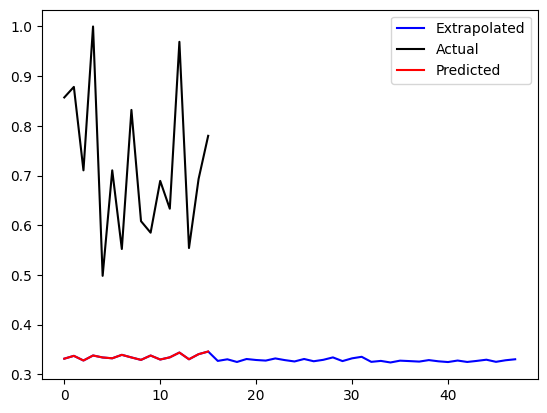

In [ ]:
with torch.no_grad():
    for i in range(X_test_torch.shape[1], X_test_torch.shape[1] + num_future_steps):
        # Prediction des nächsten Wertes
        next_pred = model(X_extrapolate[:, :i, :])

        # Update des Input Tensors mit dem letzten vorhergesagten Wert
        X_extrapolate[:, i, :] = next_pred.view(-1, 1)

    # Squeeze und numpy umwandeln, für die Visualisierung
    y_pred_extrapolated = X_extrapolate[:, -num_future_steps:, :].squeeze(2).cpu().numpy()

# visualize extrapolation
sns.lineplot(x= np.linspace(0, len(y_pred_extrapolated.flatten('F'))-1, num=len(y_pred_extrapolated.flatten('F'))), y=y_pred_extrapolated.flatten('F'), label='Extrapolated', color='blue')

sns.lineplot(x=x_act, y=y_act.squeeze(), label = 'Actual',color='black')

sns.lineplot(x=x_act, y=y_pred, label = 'Predicted',color='red')

In [ ]:
x_act

range(0, 16)